In [ ]:
pip install yfinance

     |████████████████████████████████| 5.5MB 19.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=aad180e072f8a78cb2a658682f5f68461cec4ba9461abd2753fbe888e7ba05a9
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
df = yf.download('^BSESN', start='2001-01-01', end='2011-02-02')['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Date
2001-01-02    4018.879883
2001-01-03    4060.020020
2001-01-04    4115.370117
2001-01-05    4183.729980
2001-01-08    4120.430176
Name: Adj Close, dtype: float64

In [ ]:
df.describe()

count     2492.000000
mean      9734.544049
std       5657.299549
min       2600.120117
25%       4095.332397
50%       8877.715332
75%      14871.902832
max      20932.480469
Name: Adj Close, dtype: float64

## **Adjusted close price**

In [ ]:
import yfinance as yf
tickers = ['^BSESN']
df = yf.download(tickers,start='2001-01-01', end='2011-02-02' )['Adj Close']

[*********************100%***********************]  1 of 1 completed


No handles with labels found to put in legend.


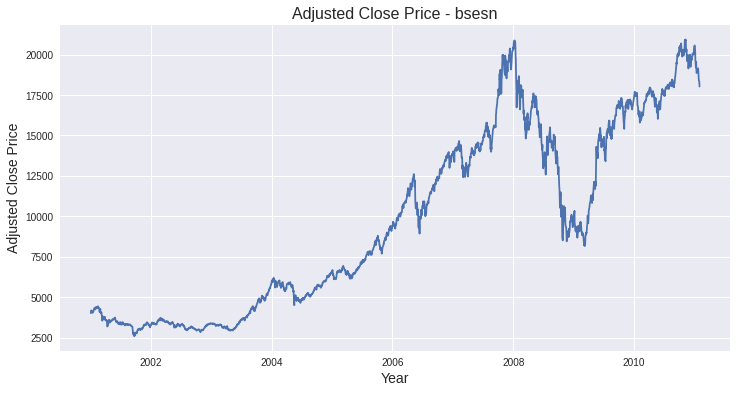

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Register the converters
pd.plotting.register_matplotlib_converters()
# Load the data
#df = get_adjusted_close()
# Set the style to seaborn for plotting
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the cumulative returns fot each symbol
ax.plot(df)
ax.legend()
plt.title('Adjusted Close Price - bsesn', fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()
plt.close()

In [ ]:
import yfinance as yf
tickers = ['GOOG', 'MSFT', 'SPY','^BSESN']
df = yf.download(tickers, start='2001-01-01', end='2011-02-02')['Adj Close']

[*********************100%***********************]  4 of 4 completed


## **Cumulative Returns**

NameError: ignored

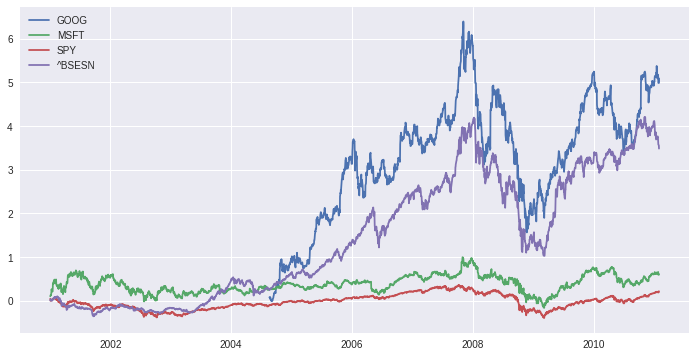

In [ ]:
# imports omitted…
# Set the style to seaborn for plotting
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 6))
# Plot the cumulative returns for each symbol
for ticker in tickers:
    ax.plot((df[ticker].pct_change()+1).cumprod()-1, label=ticker)
ax.legend()
# Show y axis in %
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
title = 'Cumulative Returns — ' + ', '.join(s for s in tickers)
plt.title(title, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns %', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()
plt.close()

## **Moving Average**

In [ ]:
import yfinance as yf
tickers = ['^BSESN']
df = yf.download(tickers,start='2001-01-01', end='2011-02-02' )['Adj Close']

[*********************100%***********************]  1 of 1 completed


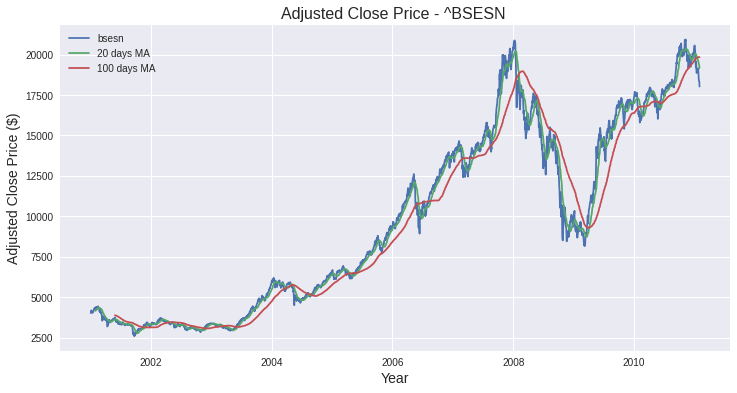

In [ ]:
# Load the stock symbol MSFT – Tiingo (method not shown)
#bsesn = get_adjusted_close().loc['^BSESN']
# Set the style to seaborn for plotting
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 6))
# Calculate the 20 and 100 days moving averages of the closing prices
df_20_ma = df.rolling(window=20).mean()
df_100_ma = df.rolling(window=100).mean()
# Start from 24/05/2019 as there are no data before for 100-day MA
start_date = ('2001-01-01')
ax.plot(df[start_date:],label='bsesn')
ax.plot(df_20_ma[start_date:], label='20 days MA')
ax.plot(df_100_ma[start_date:], label='100 days MA')
ax.legend()
plt.title('Adjusted Close Price - ^BSESN ', fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Adjusted Close Price ($)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()
plt.close()

## **Sentimental analysis**

In [2]:
pip install vaderSentiment

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ^BSESN.csv to ^BSESN (1).csv


In [5]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['^BSESN.csv']))
# Dataset is now stored in a Pandas Dataframe
df1.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
5,2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0
6,2001-01-10,4151.580078,4155.859863,4035.439941,4047.639893,4047.639893,0.0
7,2001-01-11,4066.129883,4077.540039,4006.540039,4027.129883,4027.129883,0.0
8,2001-01-12,4059.409912,4082.770020,4018.280029,4036.580078,4036.580078,0.0
9,2001-01-15,4074.320068,4080.139893,4018.239990,4046.760010,4046.760010,0.0


In [6]:
import pandas as pd
# Reading data from remote link
url = "https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/DPQMQH/P2Z4PM"
print('url')
df2 = pd.read_csv(url)
print("Data imported successfully")

df2.head(10)

url
Data imported successfully


,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [7]:
import pandas as pd
df2['publish_date']=pd.to_datetime(df2['publish_date'],format='%Y%m%d') 

In [8]:
df2.columns

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

In [9]:
df2.rename(columns={'publish_date':'Date',
                          }, 
                 inplace=True)

In [10]:
print(df2.columns)

Index(['Date', 'headline_category', 'headline_text'], dtype='object')


In [11]:
df2.head(10)

,Date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa
5,2001-01-02,unknown,Extra buses to clear tourist traffic
6,2001-01-02,unknown,Dilute the power of transfers; says Riberio
7,2001-01-02,unknown,Focus shifts to teaching of Hindi
8,2001-01-02,unknown,IT will become compulsory in schools
9,2001-01-02,unknown,Move to stop freedom fighters' pension flayed


In [12]:
df1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [13]:
df2.dtypes

Date                 datetime64[ns]
headline_category            object
headline_text                object
dtype: object

In [14]:
df1["Date"] = df1['Date'].astype('datetime64[ns]')

In [15]:
import pandas as pd 

merged_df = pd.merge(df1, df2, how='inner',on=['Date','Date']) 
merged_df.head(5)



,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,unknown,America's unwanted heading for India?
3,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,unknown,For bigwigs; it is destination Goa
4,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,unknown,Extra buses to clear tourist traffic


In [ ]:
#Combine the top news headlines
headlines = []
#for row in range(0,len(merge.index)):
 #   headlines.append(' '.join(str(x) for x in merge.iloc[row,2:27]))

#merged_df.iloc[:, lambda df: [8]]
#' '.join(str(y) for y in merged_df.headline_text iloc[0,0:25])
#' '.join(str(x) for x in)
for column in range(0,746423 ):
    headlines.append(' '.join(str(x) for x in merged_df.iloc[:, lambda df: [8]] ))

In [17]:
#Clean the data
clean_headlines = []
for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]+", '', headlines[i] ))
  clean_headlines[i] = re.sub('b[(")]+', '', clean_headlines[i] )
  clean_headlines[i] = re.sub("\'", '', clean_headlines[i] )

In [ ]:
#Add the clean headlines to the data set
merged_df['Combined_News'] = clean_headlines


In [19]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
# Create a function to get the polarity
def getPolarity(text):
  return  TextBlob(text).sentiment.polarity



In [ ]:
# Create two new columns 'Subjectivity' & 'Polarity'
merged_df['Subjectivity'] =merged_df['Combined_News'].apply(getSubjectivity)
merged_df['Polarity'] = merged_df['Combined_News'].apply(getPolarity)

In [21]:
#Create a function to get the sentiment scores (using Sentiment Intensity Analyzer)
def getSIA(text):
  sia = SentimentIntensityAnalyzer()
  sentiment = sia.polarity_scores(text)
  return sentiment

In [ ]:
compound = []
neg = []
neu = []
pos = []
SIA = 0
for i in range(0, len(merged_df['Combined_News'])):
  SIA = getSIA(merged_df['Combined_News'][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])
  

In [ ]:
#Store the sentiment scores in the data frame
merged_df['Compound'] =compound
merged_df['Negative'] =neg
merged_df['Neutral'] =neu
merged_df['Positive'] = pos
merged_df['Label'] = lab


In [ ]:

#Create a list of columns to keep
keep_columns = { 'Open',  'High', 'Low',    'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive', 'Label' }
df = merged_df[keep_columns]



In [ ]:
import numpy as np
#Create the feature data set
X= df
X = np.array(X.drop(['Label'],1))
#Create the target data set
y = np.array(df['Label'])

In [ ]:
#Split the data into 80% training and 20% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)